### Resumo

Esse notebook tem como objetivo aplicar os seguintes algoritmos e avalia-los
 - MeanShitf
 - KMeans
 - Gaussian Mixture Models
 

In [1]:
import pandas as pd
import numpy as np 

In [2]:
data = pd.read_csv('data_remake.csv')

In [3]:
data.head()
data.shape

(5811, 5986)

## Avaliação do KMeans

In [4]:
# É um método que que calcula o erro quadrático entre a média e o dado, o melhor k seria aquele que forma um 
# "cotovelo".

import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabaz_score
from sklearn.cluster import KMeans

def kmeans_analysis(input_data, tot_range=[1,20]):
        """
            Método que realiza algumas análises estatísticas do KMeans
            
        """
        
        erro = []
        silhueta = []
        calinski = []
        
        # Realiza para todos os k 
        for k in range(tot_range[0], tot_range[1]+1):
            modelo = KMeans(n_clusters=k).fit(input_data)
            
            # Inertia
            erro.append(modelo.inertia_)
            
            # Silhueta
            silhueta.append( silhouette_score(input_data, modelo.labels_) )
            
            # Calinski
            calinski.append( calinski_harabaz_score(input_data, modelo.labels_) )
        

        
        # Plot do Elbow Method
        plt.figure(1)
        
        plt.xlabel('Clusters')
        plt.ylabel('Inertia')
        plt.grid(True)
        
        plt.plot( range(tot_range[0], tot_range[1]+1), erro, c='blue')
        plt.scatter(range(tot_range[0], tot_range[1]+1), erro, c='red')
    
        plt.figure(2)
        plt.title('Silhueta')
        
        plt.xlabel('Clusters')
        plt.ylabel('Silhueta')
        plt.grid(True)
        
        plt.plot(range(tot_range[0], tot_range[1]+1), silhueta )
        
        plt.figure(3)
        plt.xlabel('Clusters')
        plt.ylabel('Y')
        plt.grid(True)
        plt.plot(range(tot_range[0], tot_range[1]+1), calinski)
        
        plt.show()

### Avaliação do kmeans

#### Silhueta

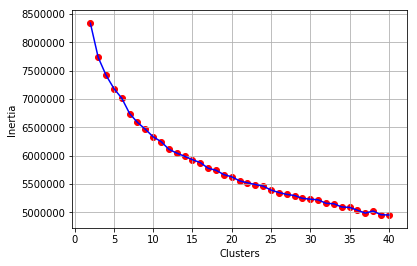

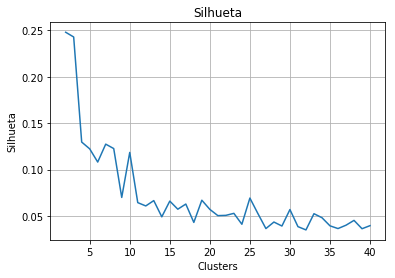

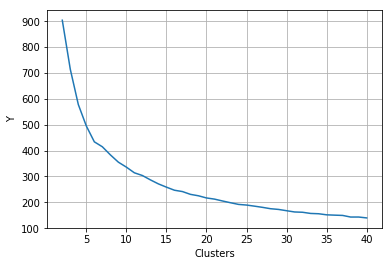

In [10]:
kmeans_analysis(data.iloc[:, 1:500], [2,40])